<a href="https://colab.research.google.com/github/shashanktk/Tensile-test-algorithm/blob/main/Test_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **This code is used to get the results such as Maximum Force, Maximum Stress, Strain, etc which are obtained after conducting the Tensile test.**





Firstly, we need to load the Excel files obtained after converting .TRA files  

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Reading the excel files
df = pd.read_excel('/content/Specimen13_T1.xlsx', header =163, index_col= None)

#To know the number of rows in the dataframe
actual = df.shape[0]
n = actual - 1

After reading excel files, we use this function to calculate Max. Force, Max. Stress, Strain, Tensile modulus based on each specimen

In [ ]:
def values():

#Picking out the Force column from the dataframe
  F = np.array(df.iloc[1:,[15]])

#Picking out the Strain column from the dataframe
  S = np.array(df.iloc[1:,[4]])

#Specimen number
  s = int(input("Specimen number: "))

#Trial number
  t = int(input('Trial number:'))
  
#Input value of Width(For tensile)
  l = float(input('Value of width: ' ))

#Input value of Thickness(For tensile)
  b = float(input('Value of thickness:' ))

#Calculation of the area based on the input values
  a = float(l*b)
  
#Array of the area calculated
  Area = a*np.ones(1)
    
#Maximum value of the Force in an array
  f = np.amax(F)

#Calculation of the stress
  Stress = (F/a)
 
#Maximum value of the stress in an array
  x = np.amax(Stress)

#Method to calculate the initial value of strain i.e at t = 1s
  Force  = np.array(df.iloc[1:,[15]]).reshape(n)                      #reshaping the array of Force/Standardkraft according to the number of rows in each excel file
  Strain = np.array(df.iloc[1:,[4]]).reshape(n)                       #reshaping the array of Strain/Dehnung according to the number of rows in each excel file
  Time   = np.array(df.iloc[1:,[19]]).reshape(n)                      #reshaping the array of Time/Systemzeit according to the number of rows in each excel file
  Stress = np.array(Stress).reshape(n)                      

#Series of each parameter 
  d1 = pd.Series(Force)
  d2 = pd.Series(Strain)
  d3 = pd.Series(Time)
  d4 = pd.Series(Stress)

#Conversion of the series into Dataframe
  d1 = d1.to_frame().rename(columns = {0: 'Force'})
  d2 = d2.to_frame().rename(columns = {0: 'Strain'})
  d3 = d3.to_frame().rename(columns = {0: 'Time'})
  d4 = d4.to_frame().rename(columns= {0: 'Stress'})

#Conversion of objects into floating point numbers
  d1['Force']  = d1['Force'].astype('float')                          # Change column type to integer
  d2['Strain'] = d2['Strain'].astype('float')
  d3['Time']   = d3['Time'].astype('float')
  d4['Stress'] = d4['Stress'].astype('float')
  d = pd.concat([d1, d2, d3, d4], axis=1)
  # print(d)
  
#Picking the values of strain which are less than t = 1.2s 
  s_values = d.loc[(d['Time'] <= 1.2)]
  # print(s_values)                                                            #printing the values of strain to confirm whether we have got 
                                                                                         #the values that are less than 1s

#Considering only a single value of strain which is approximately equal to t = 1s
  y = s_values.loc[s_values['Time'] >= 1]
  y = y.iloc[0,1]
  y_initial = 40 + y                                                             #This is the initial value of strain obtained after adding the guage length 
                                                                                         #in this case we have used guage length of 40mm, one can change this according to thier specimen

#Maximum value of the strain based on the Max Force
  max_strain = d.loc[d['Force'] == f]
  y1 = max_strain.iloc[0,1]
  y_final = 40 + y1                                                          #This is the final value of strain obtained after adding the guage length 
  y_final                                                                         #in this case we have used guage length of 40mm, one can change this according 
                                                                                      #to thier specimen
  
#Calculation of Strain value based on Initial and Final Strain values 
  Strain_percentage = ((y_final - y_initial)/y_initial) *100                 #The final value of Strain in percentage

#Caluclation of Tensile modulus based on Maximum values of stress and strain
  z = x/(Strain_percentage/100)                                                              #The value of Tensile modulus

  
#locating the stress values for graph
  stress_values = d.loc[d['Time']<=1.2]
  stress = stress_values.loc[stress_values['Time'] >= 1]
  stress = stress.iloc[0,3]

#initial stress value
  index = d.index
  index_min_stress = d['Stress'] == stress  
  i = index[index_min_stress]

#final stress value
  index1 = d.index
  index_max_stress = d['Stress'] == x
  
  i1 = index[index_max_stress]

  a = d4.loc[i[0]:i1[0]]
  a

#initial strain value 
  index2 = d.index
  index_min_strain = d['Strain'] == y
  i2 = index[index_min_strain]
  i2

#final strain value
  index3 = d.index
  index_max_strain = d['Strain'] == y1
  i3 = index[index_max_strain]
  i3
  b = d2.loc[i2[0]:i3[0]]                                                   
  b

#Dataframe
  dataframe = {'Specimen number':[s],'Trial Number': [t] ,'Area(mm2)': [a],  'Max force(N)': [f], 'Max stress(MPa)': [x],
     'Initial Strain(mm)':[y_initial],'Final Strain(mm)':[y_final],'Max strain(%)': [Strain_percentage],'Tensile Modulus(MPa)': [z]}

 
  
#plotting the stress vs strain graph
  plt.plot(b, a)
  s_num = input('Specimen num:' )
  t_num = input('Trial: ' )
  # plt.title('Stress Vs Strain graph for specimen '  + s_num + "T"+t_num)
  plt.ylabel('Stress (N/mm2)')
  plt.xlabel('Strain (mm/mm)')
  plt.show()
  # plt.savefig(s_num+t_num + ".png", bbox = "tight", dpi = 300, quality = 90, optimize = True)

  return(pd.DataFrame(data = dataframe, index=[0]))





Specimen number: 13
Trial number:1
Value of width: 10.6
Value of thickness:7
Specimen num:13
Trial: 1


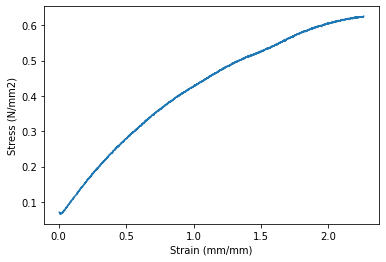

,Specimen number,Trial Number,Area(mm2),Max force(N),Max stress(MPa),Initial Strain(mm),Final Strain(mm),Max strain(%),Tensile Modulus(MPa)
0,13,1,Stress 18 0.070977 19 0.070027 2...,46.3941,0.625257,40.004128,42.26233,5.644923,11.076456


In [ ]:
values()